# **Classification Neural Network with PyTorch**

Python Notebook created by Ganesh_9124, CSE with major in AI, IIITDM Kanceepuram.



## **0. Classification Problems:**

1. Binary Clssification - output is yes or no
2. Multiclass Classification - output is one of the class label with highest probability
3. Multilabel Classification - Each instance can belong to multiple classes at the same time
    like an image can have tags like ['cat', 'black', 'outdoors'].

In [ ]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **sklearn.datasets**

some few standard datasets that come with scikit-learn which donot require to download and load the data.

for more info about sklearn.datasets:

https://scikit-learn.org/stable/datasets.html

**Generated datasets**

scikit learn includes the various random sample generators that can be used to generate datasets of controlled size and complexity.


for creation of multiclass datasets by allocating each class one or more normally-distributed clusters of points.
1. make_classification
2. make_blobs

for creation of binaryclass datasets, these methods generate 2d binary classification datasets.  
1. make_circles
2. make_moons


for more info about generators method:
https://scikit-learn.org/stable/datasets/sample_generators.html



## **1. Make classification data and get it ready**

In [ ]:
# create some custom dataset for classification
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"X: {X[:5]}")
print(f"y: {y[:5]}")

X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y: [1 1 1 1 0]


In [ ]:
# make DataFrame of circle data

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "Label":y})

In [ ]:
circles.head()

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


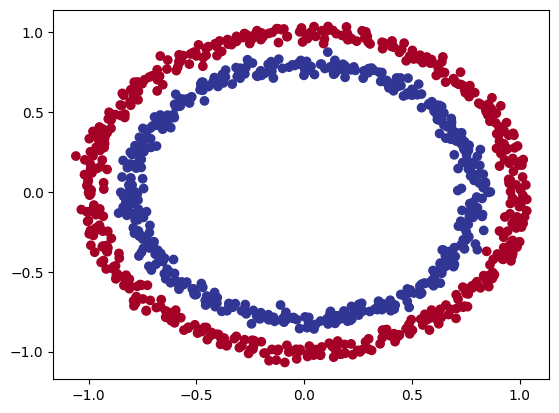

In [ ]:
# visualize the dataset

plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu);

### **1.1 Check input and outputs shapes**

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### **1.2 Turn data into Tensors and create train test splits**

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## **2. Build model**

To do so:

* Setup device agnostic code, to run code on accelerator (GPU)
* Costruct a model (by subclassing nn.Module)
* Define a loss function and optimizer


In [ ]:
from torch import nn

### **2.1 Setup device agnostic code (GPU)**

In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

### **2.2 Construct a Model**

* Subclasses `nn.Module`.
* Create `nn.Linear()` that are capable of handling the shapes of data.
* Defines a `forward()` method that performs a forward pass of the model.
* Instatiate an instance of our model class and send it to the target device.

#### **torch.nn.Linear()**

Applies the linear transformation to the incoming data : y = xA^T + b

torch.nn.Linear(int_features, out_features, bias=True, device=None, dtype=None)

if bool set to False, the layer won't learn an additive bias.and

for more info:
  https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [ ]:
# 1. Construct the model that subclasses the nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()   # initialise the constructor of parent class

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data

    self.layer1 = nn.Linear(in_features=X_train.shape[1],
                            out_features=10
                            )

    self.layer2 = nn.Linear(in_features=10,
                            out_features=1
                            )

    # 3. Define a forward method that outlines the forward pass

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      output = self.layer1(x)
      output = self.layer2(output)

      return output

In [ ]:
# 4. Instantiate an instance of our model class and send it to target device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

#### **torch.nn.Sequential:**

Modules added to container in the order they are passed and executed in the order they are passsed.

* Modules will be added to it in the order they passed to constructor
* Alternatively, an OrderedDict of modules can also be passed to the constructor.

for more info:
  https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

for visualisation of neural networks, forward pass and backward propagation, visit the following webpage:
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.0001&regularizationRate=0&noise=0&networkShape=5,1&seed=0.16040&showTestData=true&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
# Let's replicate the model using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4826,  0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217,
                      -0.4217,  0.6360], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,
                        0.2628, -0.1633]], device='cuda:0')),
             ('1.bias', tensor([-0.2156], device='cuda:0'))])

### **2.3 Loss function and Optimizer:**

which loss function and optimizer should be used?

this is problem specific.

Loss functions: measures how *wrong* models predictions are.

  * for Regression:
      * Mean Absolute Error (MAE)
      * Mean Squared Error (MSE)
      * Mean Squared Logarithmic Error (MSLE)
      * Huber Loss

  * for Classification:
      * Binary Cross Entropy
      * Categorical Cross Entropy
      * Sparse Categorical Cross Entropy
      * Negative Log Likelihood Loss
      * Cross Entropy Loss
      * Kullback-Leibler Divergence
      * Hinge Loss
      * Squared Hinge Loss
      * Multiclass Hinge Loss
      * Multilabel
      * MultilabelMarginLoss
      * Smoothed Cross

  for more info:
    https://pytorch.org/docs/stable/nn.html#loss-functions

Optimizers:

  * torch.optim.SGD
  * torch.optim.Adam - most famous
  * torch.optim.Ada
  * torch.optim.Adagrad
  * torch.optim.Adamax
  * torch.optim.ASGD
  * torch.optim.LBFGS
  * torch.optim.RMSprop
  * torch.optim.R

  for more info:
    https://pytorch.org/docs/stable/optim.html

#### **Logits:**

These can be defined as the output of a linear transformation which get forwards to the activation function (generally in the last layer of a neural network and activation function is *softmax*).

for more info:
  https://community.deeplearning.ai/t/why-logit-stands-for-the-output-of-linear-activation-function/198805/9

In [ ]:
# set up loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


#### **Accuracy function:**

In [ ]:
# Define accuracy function
def accuracy_fn(y_preds, y_true):
  correct = torch.eq(y_preds, y_true).sum().item()
  acc = (correct / len(y_preds)) * 100
  return acc

## **3. Train the Model:**

0. train loop
1. Forward pass
2. Calculate loss
3. Optimizer zero_grad()
4. Loss backward
5. Optimizer step(gradient descent step)

### **3.1 Going from raw logits -> prediction -> prediction labels**

Our model outputs logits.

We can convert these logits to prediction probabilities by passing them to some kind of activation function like *sigmoid* for binary classification and *softmax* for multiclass classification.

Then we can prepare predictions labels by either rounding probabilities using *argmax()*

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.5374],
        [-0.2021],
        [-1.1357],
        [-0.3690],
        [-0.6904]], device='cuda:0')

In [ ]:
# Use the sigmoid function on our model logits to turn them into prediction probabilities.

y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs[:5]

tensor([[0.3688],
        [0.4496],
        [0.2431],
        [0.4088],
        [0.3339]], device='cuda:0')

In [ ]:
y_preds_probs = torch.round(y_preds_probs)
y_preds_probs[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [ ]:
# full flow (logits -> prediction probabilities -> prediction labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
print(y_preds_labels[:5])

# print(torch.eq(y_preds_labels, y_preds_probs))

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)


### **3.2 Building a training and testing loop:**



In [ ]:
# Build train and evaluation loop
torch.manual_seed(2)
torch.cuda.manual_seed(2)

# define hyperparameters
epochs = 200

# put data on cuda device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  ### training mode
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/ accuaracy
  training_loss = loss_fn(y_logits,
                 y_train)

  training_acc = accuracy_fn(y_preds,
                    y_train)

  # zero_grad
  optimizer.zero_grad()

  # backpropagation
  training_loss.backward()

  # optimizer step
  optimizer.step()

  ### testing

  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(test_preds,
                           y_test)

  if epoch % 10 ==0:
    print(f"Epoch {epoch} | Training Loss: {training_loss} | Training Accuracy: {training_acc} | Testing Loss: {test_loss} | Testing Accuracy: {test_acc}")

Epoch 0 | Training Loss: 0.7587690353393555 | Training Accuracy: 42.25 | Testing Loss: 0.7722338438034058 | Testing Accuracy: 40.0
Epoch 10 | Training Loss: 0.7505427598953247 | Training Accuracy: 41.5 | Testing Loss: 0.7638717293739319 | Testing Accuracy: 39.5
Epoch 20 | Training Loss: 0.7434139847755432 | Training Accuracy: 42.0 | Testing Loss: 0.7565714716911316 | Testing Accuracy: 40.0
Epoch 30 | Training Loss: 0.7372360229492188 | Training Accuracy: 44.0 | Testing Loss: 0.7501935958862305 | Testing Accuracy: 42.0
Epoch 40 | Training Loss: 0.7318810820579529 | Training Accuracy: 45.25 | Testing Loss: 0.7446163296699524 | Testing Accuracy: 43.0
Epoch 50 | Training Loss: 0.7272383570671082 | Training Accuracy: 46.25 | Testing Loss: 0.7397336959838867 | Testing Accuracy: 45.5
Epoch 60 | Training Loss: 0.7232113480567932 | Training Accuracy: 46.0 | Testing Loss: 0.735454261302948 | Testing Accuracy: 47.0
Epoch 70 | Training Loss: 0.7197167277336121 | Training Accuracy: 45.375 | Testing

## **4. Make predictions and evaluate the model.**

From the metrics it looks like our model isn't learning.
So, to inspect it let's make some predictions on the test data and visualise it.


To do so, we are going to import a function called `plot_decision_boundary()`

#### **Requests Module in Python**

  If allows you to send HTTPS/1.1 request extremely easily. there's no need to manually add query strings to your URL's or to form-encode your `PUT` and `POST` data.

  for more info:
  https://pypi.org/project/requests/

#### **Pathlib module in Python**

  This module offers classes representing filesystem paths with semantics appropriate for different operating systems.

  * Pure paths: Path classes divided between these Pure paths, which provides purely computational operations without I/O.

  * Concrete Path: Inherits from pure path but also provide I/O operations.

  Reference: https://docs.python.org/3/library/pathlib.html

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repository.

if Path("helper_function.py").is_file():
  print(f"helper_function.py is already exists")

else:
  print(f"Downloading helper_fuctions.py")
  request = requests.get(f"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

helper_function.py is already exists


In [ ]:
from helper_function import plot_decision_boundary, plot_predictions


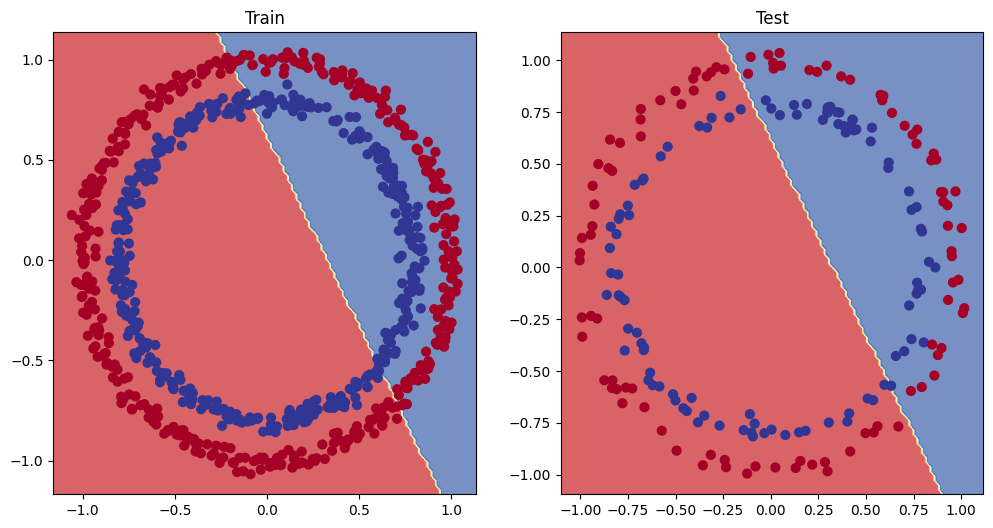

In [ ]:
# plot decision boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## **5. Improving a model**

* Add more layers - give the model more chances to learn about patterns in the data.
* Add more hidden units
* Fit/train the model for longer - increase the number of epochs.
* Try different activation functions.
* Try different optimizer.
* Try different learning rate.
* Try different loss function.

These options are from a model's perspective because they deal directly with the model, rather than the data.

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1969,  0.2946],
                      [ 0.6084,  0.3962],
                      [-0.2869,  0.4202],
                      [ 0.1511,  0.3725],
                      [-0.4129, -0.6900],
                      [-0.2621, -0.5361],
                      [ 0.5750,  0.2006],
                      [ 0.2881,  0.2208],
                      [-0.0294,  0.5439],
                      [-0.4952,  0.0487]])),
             ('0.bias',
              tensor([-0.4723,  0.2603, -0.2835,  0.1719, -0.1807,  0.5645, -0.4082, -0.4117,
                      -0.3896,  0.6211])),
             ('1.weight',
              tensor([[ 0.0393,  0.2724, -0.2932, -0.3124, -0.2077, -0.0856,  0.0143,  0.0208,
                        0.1824, -0.0355]])),
             ('1.bias', tensor([-0.0714]))])

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
# change some hyperparameters of the model

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=X_train.shape[1],
                             out_features=128
                             )

    self.activation_fn_1 = nn.PReLU(num_parameters=128)

    self.layer_2 = nn.Linear(in_features = 128,
                             out_features = 256
                             )

    self.activation_fn_2 = nn.PReLU(num_parameters=256)

    self.layer_3 = nn.Linear(in_features = 256,
                             out_features = 1)


  def forward(self, x:torch.Tensor) -> torch.Tensor:

    output = self.layer_3(self.activation_fn_2(self.layer_2(self.activation_fn_1(self.layer_1(x)))))
    return output


In [ ]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (activation_fn_1): PReLU(num_parameters=128)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (activation_fn_2): PReLU(num_parameters=256)
  (layer_3): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1622, -0.1683],
                      [ 0.1939, -0.0361],
                      [ 0.3021,  0.1683],
                      [-0.0813, -0.5717],
                      [ 0.1614, -0.6260],
                      [ 0.0929,  0.0470],
                      [-0.1555,  0.5782],
                      [ 0.0472,  0.2932],
                      [ 0.2992, -0.4171],
                      [-0.2718,  0.6800],
                      [-0.6926, -0.0480],
                      [-0.0560,  0.5016],
                      [-0.0672,  0.1862],
                      [-0.0339, -0.3959],
                      [-0.4008, -0.3435],
                      [-0.6423, -0.4589],
                      [ 0.1664,  0.4654],
                      [ 0.0348, -0.3241],
                      [ 0.3108, -0.2714],
                      [-0.1566, -0.3876],
                      [-0.2220, -0.6552],
                      [ 0.3017,  0.2749],
                      [ 0.1405,  0.3472],
  

In [ ]:
# check output model_1
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))
  y_preds_1 = torch.round(torch.sigmoid(y_logits))

y_preds_1[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
# setup loss fn and optimizer for model_1
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

In [ ]:
# training loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  ### training

  model_1.train()

  # 1. forward pass
  y_logits = model_1(X_train.to(device)).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  training_loss = loss_fn(y_logits,
                          y_train.to(device))

  training_acc = accuracy_fn(y_preds,
                             y_train)

  # zero grad
  optimizer.zero_grad()

  # backpropagation
  training_loss.backward()

  # optimizer step
  optimizer.step()


  ### testing
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test.to(device)).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(test_preds,
                           y_test)

    if epoch % 10 ==0:
      print(f"Epoch {epoch} | Training Loss: {training_loss} | Training Accuracy: {training_acc} | Testing Loss: {test_loss} | Testing Accuracy: {test_acc}")

Epoch 0 | Training Loss: 0.6947396397590637 | Training Accuracy: 46.75 | Testing Loss: 0.6943825483322144 | Testing Accuracy: 46.0
Epoch 10 | Training Loss: 0.6947041153907776 | Training Accuracy: 46.5 | Testing Loss: 0.694364607334137 | Testing Accuracy: 46.0
Epoch 20 | Training Loss: 0.694668710231781 | Training Accuracy: 46.625 | Testing Loss: 0.6943466067314148 | Testing Accuracy: 46.0
Epoch 30 | Training Loss: 0.6946333050727844 | Training Accuracy: 46.625 | Testing Loss: 0.6943286061286926 | Testing Accuracy: 45.5
Epoch 40 | Training Loss: 0.6945980787277222 | Training Accuracy: 46.5 | Testing Loss: 0.6943106055259705 | Testing Accuracy: 45.5
Epoch 50 | Training Loss: 0.6945626735687256 | Training Accuracy: 46.625 | Testing Loss: 0.6942926049232483 | Testing Accuracy: 45.0
Epoch 60 | Training Loss: 0.6945274472236633 | Training Accuracy: 47.125 | Testing Loss: 0.6942744255065918 | Testing Accuracy: 45.5
Epoch 70 | Training Loss: 0.6944923400878906 | Training Accuracy: 47.25 | Tes

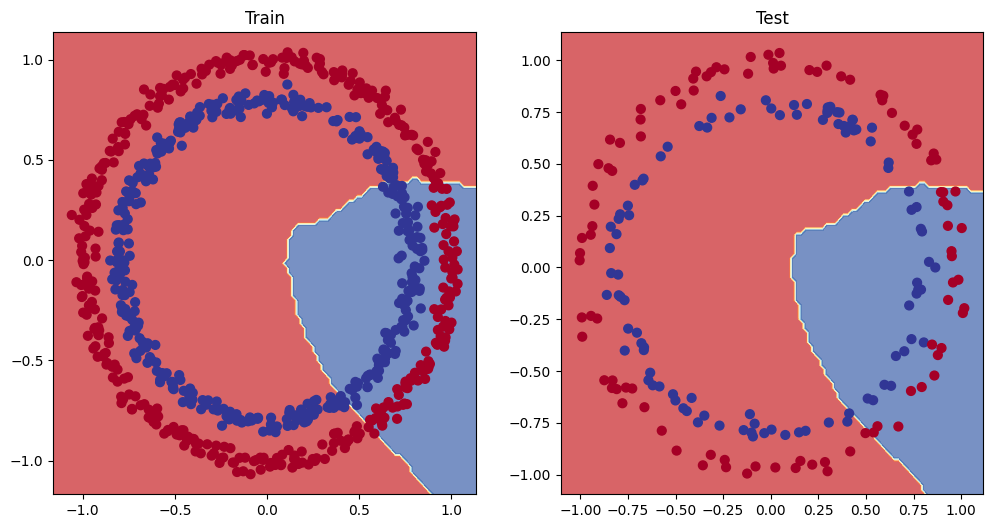

In [ ]:
# plot decision boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### **5.1 Preparing data to see if our model can fit a straight line**

One way to troubleshoot to a larger problem is to test out smaller problem

In [ ]:
# create some data

weight = 0.7
bias = 0.3

step = 0.01
start = 0
end = 10

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight* X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# split data

train_split = int(0.8 * len(X))

X_train, y_train = X[0:train_split], y[0:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

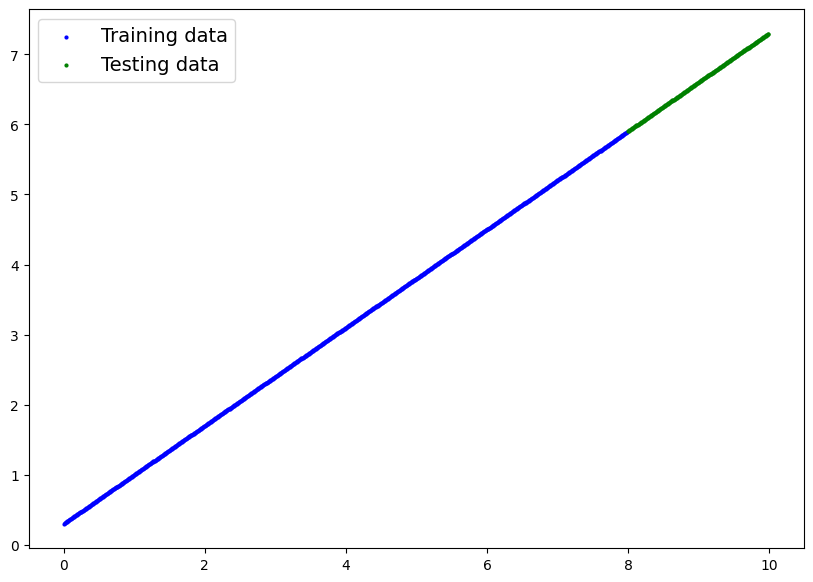

In [ ]:


plot_predictions (train_data = X_train,
                  train_labels = y_train,
                  test_data = X_test,
                  test_labels = y_test)

### **5.2 Defining the model architecture**

model_2 for regression for straight line data obtained above using nn.Sequential()

In [ ]:
# Same architecture as model_1

model_2 = nn.Sequential(
    nn.Linear(in_features = 1,
              out_features = 10),
    nn.Linear(in_features = 10,
              out_features = 10),
    nn.Linear(in_features = 10,
              out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)


In [ ]:
# train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data on target device

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# 0. training loop

for epoch in range(epochs):
  ### training

  model_2.train()

  # 1. forward pass
  y_preds = model_2(X_train)

  # 2. calculate the loss
  training_loss = loss_fn(y_preds,
                          y_train)


  # 3. zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  training_loss.backward()

  # 5. optimization step
  optimizer.step()


  ### testing
  model_2.eval()

  with torch.inference_mode():
    test_preds = model_2(X_test)
    test_loss = loss_fn(test_preds,
                        y_test)

    if epoch % 50 ==0:
      print(f"Epoch: {epoch} | training loss: {training_loss:.5f} | testing loss: {test_loss:.5f}")


Epoch: 0 | training loss: 2.15740 | testing loss: 2.77034
Epoch: 50 | training loss: 0.46185 | testing loss: 0.20645
Epoch: 100 | training loss: 0.08261 | testing loss: 1.03417
Epoch: 150 | training loss: 0.24523 | testing loss: 0.51389
Epoch: 200 | training loss: 0.43382 | testing loss: 0.03243
Epoch: 250 | training loss: 0.13552 | testing loss: 0.73904
Epoch: 300 | training loss: 0.03052 | testing loss: 0.92316
Epoch: 350 | training loss: 0.19693 | testing loss: 0.50804
Epoch: 400 | training loss: 0.37899 | testing loss: 0.01039
Epoch: 450 | training loss: 0.20571 | testing loss: 0.54059
Epoch: 500 | training loss: 0.34008 | testing loss: 0.27483
Epoch: 550 | training loss: 0.05858 | testing loss: 0.81638
Epoch: 600 | training loss: 0.26190 | testing loss: 0.27277
Epoch: 650 | training loss: 0.34077 | testing loss: 0.04666
Epoch: 700 | training loss: 0.22097 | testing loss: 0.43984
Epoch: 750 | training loss: 0.29862 | testing loss: 0.28084
Epoch: 800 | training loss: 0.14205 | testi

### **5.3 Plotting the prediction values**

In [ ]:
X_train.device

device(type='cuda', index=0)

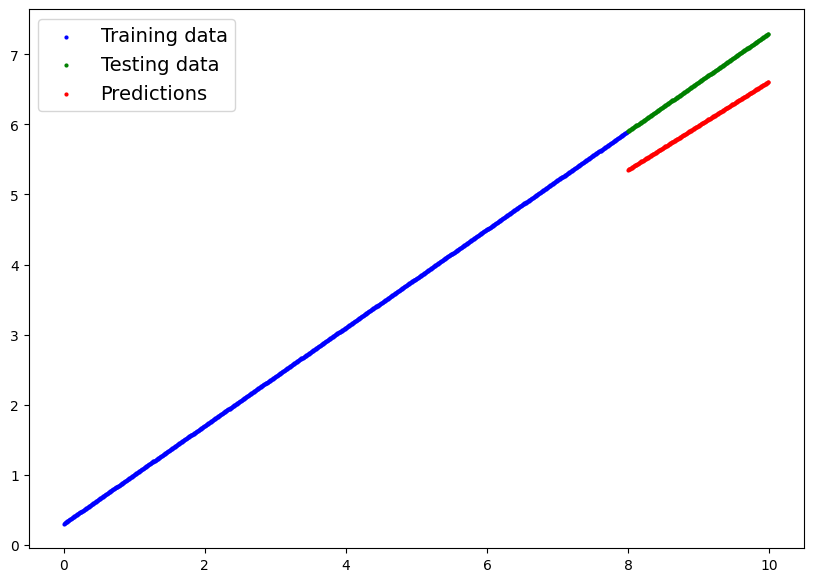

In [ ]:
# turn inference mode on for predictions
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)

plot_predictions(train_data=X_train.to("cpu"),
                 train_labels=y_train.to("cpu"),
                 test_data=X_test.to("cpu"),
                 test_labels=y_test.to("cpu"),
                 predictions=y_preds.to("cpu"))

## **6. The missing piece - Non-Linearity**



### **6.1 Reusing non-linear circles data**

In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# create some custom dataset for classification
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

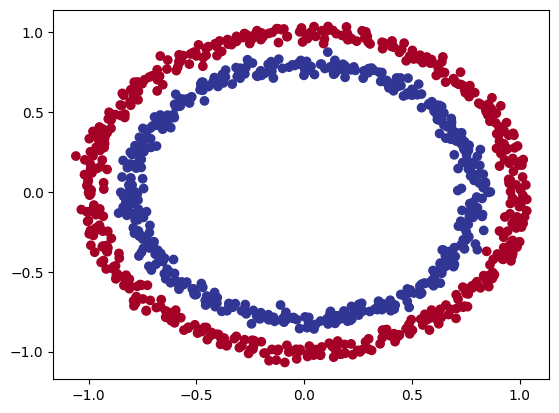

In [ ]:

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu
            );


In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_recreated[:5], y_recreated[:5]

(tensor([[ 0.6519,  0.3607],
         [-0.5681,  0.2844],
         [-0.9384,  0.5870],
         [-0.6947,  0.5173],
         [ 0.4711, -0.8815]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# split data set

X_recreated_train, X_recreated_test, y_recreated_train, y_recreated_test = train_test_split(X,
                                                                                            y,
                                                                                            test_size=0.3,
                                                                                            random_state=42)
len(X_recreated_train), len(X_recreated_test), len(y_recreated_train), len(y_recreated_test)

(700, 300, 700, 300)

### **6.2 Build model with non-linearities**

To introduce non-linearity in neural network we need to add non-linear activation functions to layers.
such as
* sigmoid
* ReLU and its variants
* softmax
* tanh

for more info:
https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity


In [ ]:
# non-linear model

class CirclesModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2,
                             out_features = 10
                             )

    self.layer_2 = nn.Linear(in_features = 10,
                             out_features = 10
                             )

    self.layer_3 = nn.Linear(in_features = 10,
                             out_features = 1
                             )

    self.relu = nn.ReLU()     # activation function

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))



In [ ]:
device

'cuda'

In [ ]:
model_3 = CirclesModelV2().to(device)
model_3.to(device)
model_3

CirclesModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

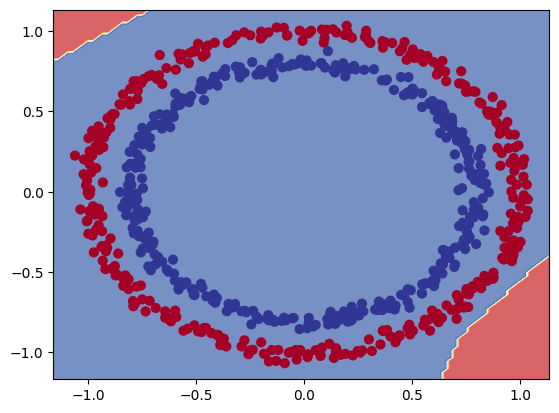

In [ ]:
plot_decision_boundary(model_3,
                       X_recreated_train,
                       y_recreated_train)

### **6.3 set up loss function and optimizer**



In [ ]:
# loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.1)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### **6.4 Train the model_3(model with non-linearities)**

In [ ]:
device

'cuda'

In [ ]:
# put data on target device
X_recreated_train, X_recreated_test, y_recreated_train, y_recreated_test = X_recreated_train.to(device), X_recreated_test.to(device), y_recreated_train.to(device), y_recreated_test.to(device)
X_recreated_train.device, y_recreated_train.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
# training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# epochs
epochs = 10000



for epoch in range(epochs):
  ### training

  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_recreated_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  training_loss = loss_fn(y_logits,
                          y_recreated_train)

  training_acc = accuracy_fn(y_preds,
                             y_recreated_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  training_loss.backward()

  # 5. optimization step
  optimizer.step()


  ### testing mode
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_recreated_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_recreated_test)

    test_acc = accuracy_fn(test_preds,
                           y_recreated_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | training loss: {training_loss: .5f} | training accuracy: {training_acc: .5f} | testing loss: {test_loss: .5f} | testing accuracy: {test_acc: .5f}")


Epoch: 0 | training loss:  0.70094 | training accuracy:  50.85714 | testing loss:  0.70859 | testing accuracy:  48.00000
Epoch: 50 | training loss:  0.69184 | training accuracy:  53.57143 | testing loss:  0.69508 | testing accuracy:  49.66667
Epoch: 100 | training loss:  0.68977 | training accuracy:  53.42857 | testing loss:  0.69232 | testing accuracy:  50.00000
Epoch: 150 | training loss:  0.68804 | training accuracy:  54.85714 | testing loss:  0.69037 | testing accuracy:  49.33333
Epoch: 200 | training loss:  0.68629 | training accuracy:  55.42857 | testing loss:  0.68857 | testing accuracy:  50.00000
Epoch: 250 | training loss:  0.68433 | training accuracy:  58.71429 | testing loss:  0.68665 | testing accuracy:  55.00000
Epoch: 300 | training loss:  0.68200 | training accuracy:  62.57143 | testing loss:  0.68439 | testing accuracy:  58.66667
Epoch: 350 | training loss:  0.67912 | training accuracy:  65.57143 | testing loss:  0.68159 | testing accuracy:  62.33333
Epoch: 400 | traini

### **6.5 Plotting decision boundary and make predictions using model_3**

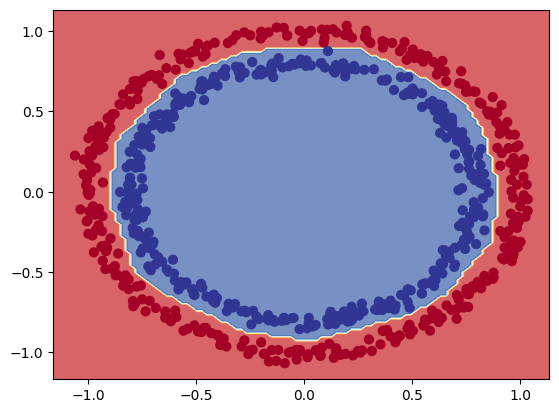

In [ ]:
plot_decision_boundary(model_3, X_recreated_train, y_recreated_train)

In [ ]:
model_3.to(device)

CirclesModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# make predictions compare with ground truth values.
model_3.eval()
with torch.inference_mode():
  predictions = model_3(X_recreated_test).squeeze()
  predictions = torch.round(torch.sigmoid(predictions))

predictions[:5], y_recreated_test[:5]

(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))